In [1]:
from imports import *
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


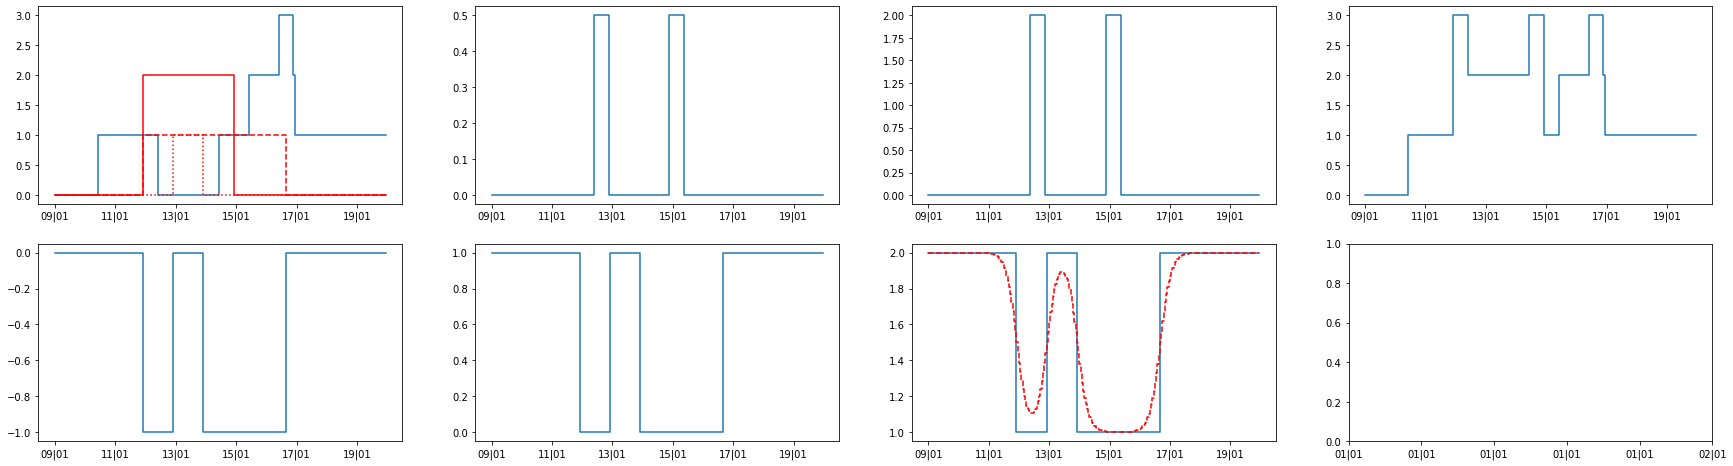

In [2]:
s1d = Step(start=pd.Timestamp(2020,1,10),end=pd.Timestamp(2020,1,16,10,15))
s2d = Step(start=pd.Timestamp(2020,1,12),weight=-1)
s3d = Step(end=pd.Timestamp(2020,1,13))
s4d = Step(start=pd.Timestamp(2020,1,14),end=pd.Timestamp(2020,1,16,12,1))
s5d = Step(start=pd.Timestamp(2020,1,15))
s6d = Step(start=pd.Timestamp(2020,1,16))

s7d = Step(start=pd.Timestamp(2020,1,11,12),end=pd.Timestamp(2020,1,14,12),weight=2)
s8d = Step(start=pd.Timestamp(2020,1,11,12),end=pd.Timestamp(2020,1,14,12),weight=2)
s9d = Step(start=pd.Timestamp(2020,1,11,12),end=pd.Timestamp(2020,1,14,12),weight=2)

s8d = Step(start=pd.Timestamp(2020,1,12,12),end=pd.Timestamp(2020,1,13,12))
s9d = Step(start=pd.Timestamp(2020,1,11,12),end=pd.Timestamp(2020,1,16,6))

std = Steps(use_datetime=True).add([s1d,s2d,s4d,s5d,s6d])
std2 = Steps(use_datetime=True).add([s8d])

t = np.arange(pd.Timestamp(2020,1,9),pd.Timestamp(2020,1,20),pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig, (axr1,axr2) = plt.subplots(ncols = 4, nrows=2, figsize=(30,8))

axr1[0].step(t,std(t))
axr1[0].step(t,s7d(t),color='r')
axr1[0].step(t,s8d(t),color='r',linestyle=':')
axr1[0].step(t,s9d(t),color='r',linestyle='--')
axr1[1].step(t,((std/s7d))(t))
axr1[2].step(t,((std*s7d))(t))
axr1[3].step(t,(std+s7d)(t))
axr2[0].step(t,(std2-s9d)(t))
axr2[1].step(t,(std2-s9d+Step(use_datetime=True))(t))
axr2[2].step(t,(std2-s9d+2)(t))
axr2[2].step(t,(std2-s9d+2).smooth_step(t,smooth_factor=30000),color='r',linestyle='--')

date_form = DateFormatter('%d|%m')
axr1[0].xaxis.set_major_formatter(date_form)
axr1[1].xaxis.set_major_formatter(date_form)
axr1[2].xaxis.set_major_formatter(date_form)
axr1[3].xaxis.set_major_formatter(date_form)

axr2[0].xaxis.set_major_formatter(date_form)
axr2[1].xaxis.set_major_formatter(date_form)
axr2[2].xaxis.set_major_formatter(date_form)
axr2[3].xaxis.set_major_formatter(date_form)


True

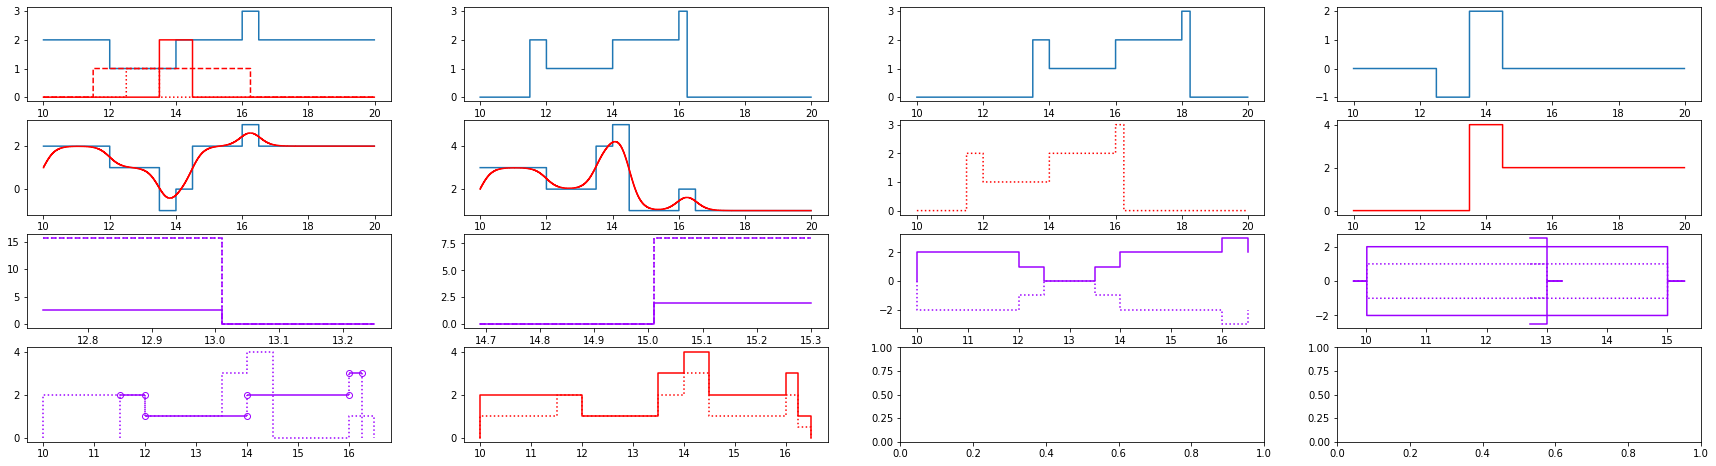

In [6]:
t = np.arange(10,20,0.01)
fig, (axr1,axr2,axr3,axr4) = plt.subplots(ncols = 4, nrows=4, figsize=(30,8))

s1 = Step(start=10,end=15,weight=2)
s2 = Step(start=12,weight=-1)
s3 = Step(end=13,weight=2.5)
s4 = Step(start=14,end=16.5)
s5 = Step(start=15,weight=2)
s6 = Step(start=16)

s7 = Step(start=13.5,end=14.5,weight=2)
s8 = Step(start=12.5,end=13.5)
s9 = Step(start=11.5,end=16.25)

st = Steps().add([s1,s2,s4,s5,s6])
st2 = Steps().add([s7])


axr1[0].step(t,st(t))
axr1[0].step(t,s7(t),color='r')
axr1[0].step(t,s8(t),color='r',linestyle=':')
axr1[0].step(t,s9(t),color='r',linestyle='--')
axr1[1].step(t,((st*s9))(t))

axr1[2].step(t,((st*s9)>>2)(t))
axr2[2].step(t,(((st*s9)>-0.5))(t),color='r',linestyle=':')

axr1[3].step(t,(st2-s8)(t))
axr2[3].step(t,(((st2-s8)>1))(t),color='r')

axr2[0].step(t,(st-st2)(t))
axr2[0].step(t,(st-st2).smooth_step(t,smooth_factor=0.35),color='r')

axr2[1].step(t,(st+st2+1)(t))
axr2[1].step(t,(st+st2+Step()).smooth_step(t,smooth_factor=0.35),color='r')


(st-s8).plot(ax=axr3[2])
(st-s8).reflect().plot(ax=axr3[2],linestyle=':')

s1.plot(ax=axr3[3])
s1.normalise().plot(ax=axr3[3],linestyle=':')

s1.reflect().plot(ax=axr3[3])
s1.reflect().normalise().plot(ax=axr3[3],linestyle=':')

s3.plot(ax=axr3[3])
s3.normalise().plot(ax=axr3[3],linestyle=':')

s3.reflect().plot(ax=axr3[3])
s3.reflect().normalise().plot(ax=axr3[3],linestyle=':')


s3.plot(ax=axr3[0])
(s3**3).plot(ax=axr3[0],linestyle='--')
(s3*s3*s3).plot(ax=axr3[0],linestyle=':')

s5.plot(ax=axr3[1])
(s5**3).plot(ax=axr3[1],linestyle='--')
(s5*s5*s5).plot(ax=axr3[1],linestyle=':')


#((s1*3*((s1*1.5)>>3))**2).plot(ax=axr3[2])
# st.plot(ax=axr3[3])
# ((st**2)).plot(ax=axr3[3],linestyle=':')
# ((st*st)).plot(ax=axr3[3],linestyle='-.')

comp1 = st+st2
comp2 = st*s9

agg_st = Steps.aggregate([comp1,comp2],np.max)
agg_st2 = Steps.aggregate([comp1,comp2],np.mean)

comp1.plot(ax=axr4[0],linestyle=':')
comp2.plot(ax=axr4[0],method='pretty')
agg_st.plot(ax=axr4[1],color='r')
agg_st2.plot(ax=axr4[1],color='r',linestyle=':')

(s3**2) == (s3*s3)

<AxesSubplot:>

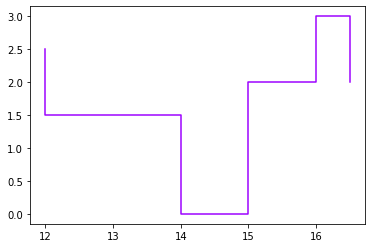

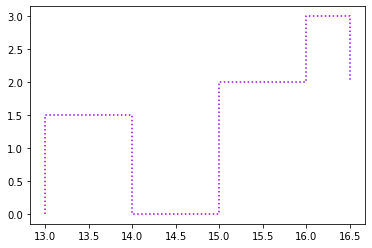

In [4]:
agg_st_dict = agg_st.to_dict(False)
agg_st_dict_cum = agg_st.to_dict()
#print(agg_st_dict_cum)

filtered_dict = {k: (v if v > 1 else 0) for k,v in agg_st_dict_cum.items()}
#print(filtered_dict)
agg_st_filtered = Steps.read_dict(filtered_dict)

#print(agg_st_filtered)
st3 = Steps().add([s3,s2,s4,s5,s6])
axx = st3.plot()
(st3>0.5).plot(linestyle=':')

In [5]:
st3_dict = st3.to_dict()
st3_dict

SortedDict({12: 1.5, 13: 1.5, 14: 0.0, 15: 2.0, 16: 3.0, 16.5: 2.0})